#### Frequent Value Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\train.csv',
                 usecols=['FireplaceQu','GarageQual','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

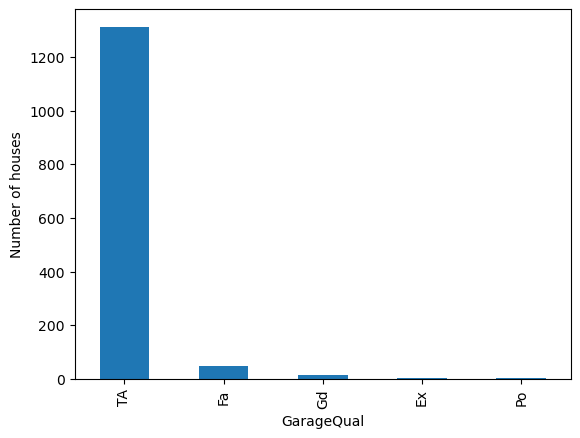

In [13]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

In [19]:
df['GarageQual'].mode()[0]

'TA'

Text(0.5, 1.0, 'GarageQual')

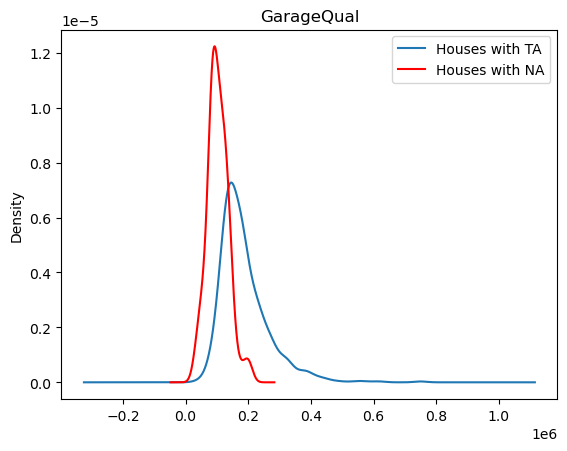

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde',ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc = 'best')

plt.title('GarageQual')



In [37]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [39]:
df['GarageQual'].fillna('TA',inplace = True)

C:\Users\porep\AppData\Local\Temp\ipykernel_18320\2002206944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace = True)


<Axes: xlabel='GarageQual'>

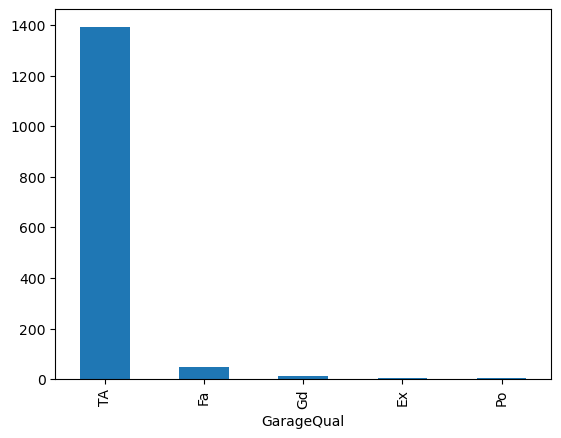

In [41]:
df['GarageQual'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'GarageQual')

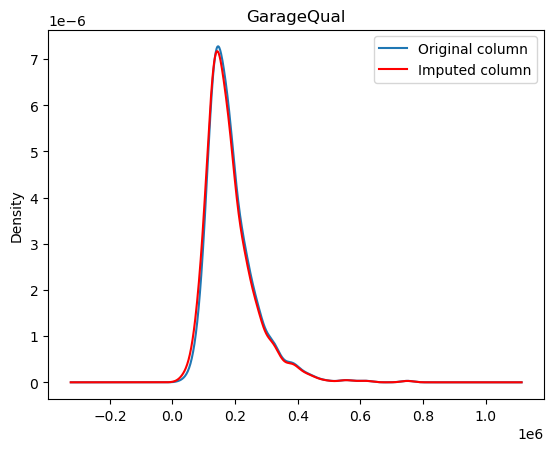

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde',ax = ax)

# Distribution of variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original column','Imputed column']
ax.legend(lines,labels,loc = 'best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

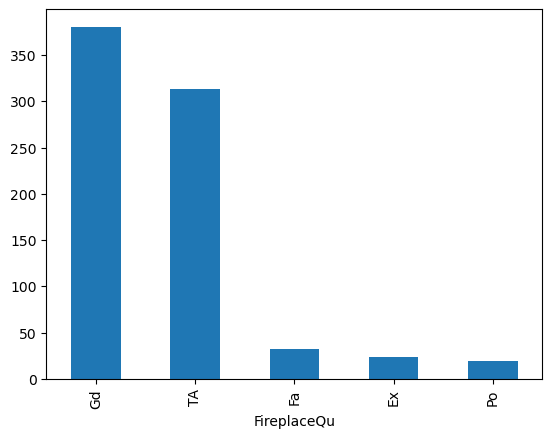

In [45]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [47]:
df['FireplaceQu'].mode()[0]

'Gd'

Text(0.5, 1.0, 'FireplaceQu')

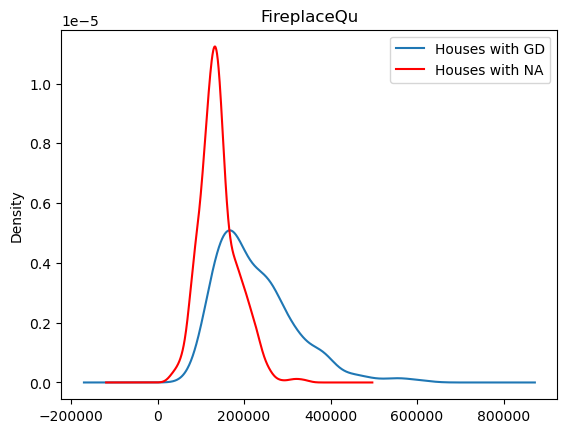

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] =='Gd']['SalePrice'].plot(kind = 'kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')
lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with GD','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [53]:
temp =df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [55]:
df['FireplaceQu'].fillna('Gd',inplace = True)

C:\Users\porep\AppData\Local\Temp\ipykernel_18320\1717838160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace = True)


<Axes: xlabel='FireplaceQu'>

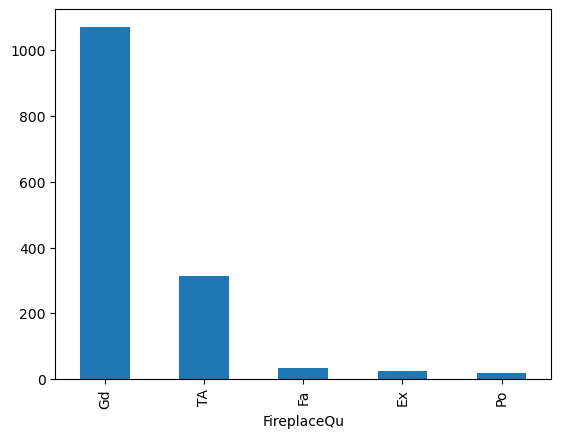

In [57]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'FireplaceQu')

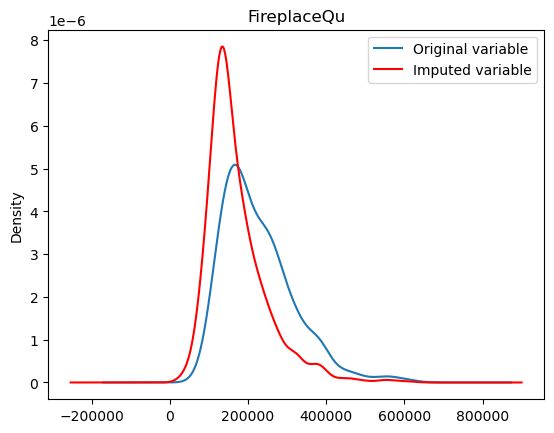

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind = 'kde',ax = ax)

# Distribution of the column after Imputation 
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc = 'best')

# add Title
plt.title('FireplaceQu')

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [63]:
from sklearn.impute import SimpleImputer

In [67]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [69]:
X_train = imputer.fit_transform(X_train)

In [71]:
X_test = imputer.transform(X_test)

In [73]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

#### Missing Category Imputation

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\train.csv',
                usecols=['FireplaceQu','GarageQual','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [85]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

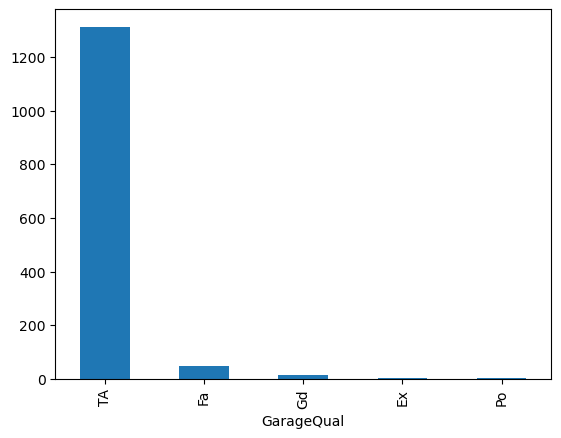

In [89]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

In [91]:
df['GarageQual'].fillna('Missing',inplace = True)

C:\Users\porep\AppData\Local\Temp\ipykernel_18320\1873110426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace = True)


Text(0, 0.5, 'Number of Houses')

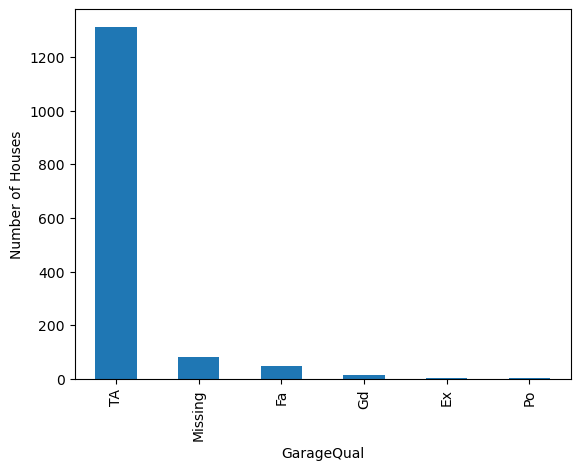

In [95]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['SalePrice']),df['SalePrice'],test_size=0.2)

In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [101]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [103]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)